# Estimate the Snow Surface using the NIR
In this notebook we show how the snow surfaces position is detected using the NIR signals. 
The Lyte probe has side looking ambient and active NIR sensors. Using these timeseries 
we can estimate where the snow surface is reliably. 

The measurement used here is manually driven at about 1 m/s 

In [22]:
# Import the function to read the data 
from study_lyte.io import read_csv 
# Impor the function to calculate the surface
from study_lyte.detect import get_nir_surface

# Import calibration function and the plotting
from numpy import poly1d
import matplotlib.pyplot as plt 

# Open the file 
df,meta = read_csv("./data/nir_surface_example.csv")
print(meta)
# Add a time column 
df['time'] = np.linspace(0,len(df.index) / int(meta['SAMPLE RATE']), len(df.index))

# Rolling mean to reduce noise
df = df.rolling(window=100).mean()



{'RECORDED': '2022-01-14--13:07:11', 'radicl VERSION': '0.5.1', 'FIRMWARE REVISION': '1.46', 'HARDWARE REVISION': '1', 'MODEL NUMBER': '3', 'SAMPLE RATE': '16000'}


## Raw Data
Below is the raw force profile. In it you can see lag time before the probe enters the snow this can make interpretation difficult.
Thus we need a way to estimate where the location of the snow surface.

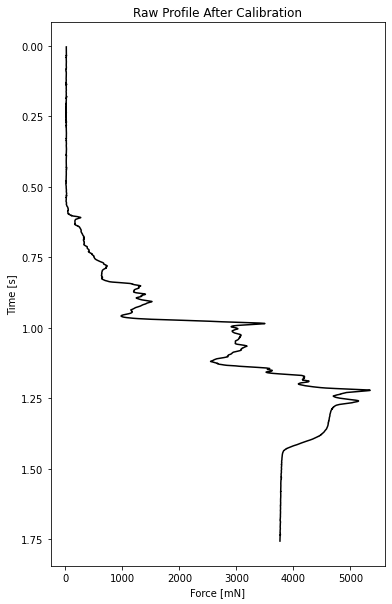

In [26]:
# Plot up the raw stuff
fig, ax = plt.subplots(figsize=(6,10))

ax.plot(df['force'], df['time'], color='k')
ax.set_title("Raw Profile After Calibration")
ax.set_xlabel('Force [mN]')
ax.set_ylabel('Time [s]')
ax.invert_yaxis()


## Workflow



**Assumptions**: 

* The two sensors are measuring the same thing above the snow 

**Steps**:

1. Normalize the two signals using the mean value of the 1st 200 points 
2. Calculate the absolute value of the active minus the ambient
3. Search for the first value greater than the threshold

In [27]:
n_points = 1000
surface = get_nir_surface(df['Sensor2'], df['Sensor3'])


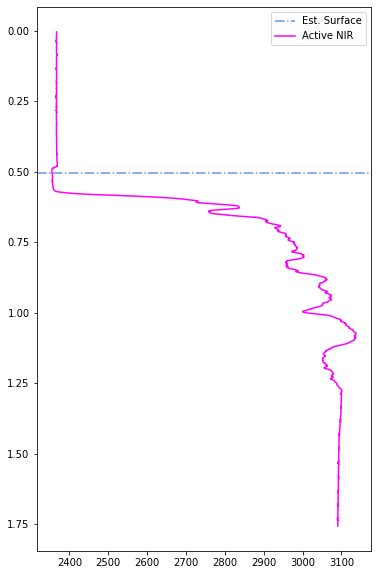

In [29]:
# Plot it up 
fig, ax = plt.subplots(figsize=(6,10), ncols=1)

ax.axhline(df['time'].iloc[surface], 0, 1,linestyle='dashdot', label='Est. Surface', color='cornflowerblue')
ax.plot(df['Sensor3'], df['time'], color='magenta', label='Active NIR')
ax.legend()
ax.invert_yaxis()

## Show off a final plot!

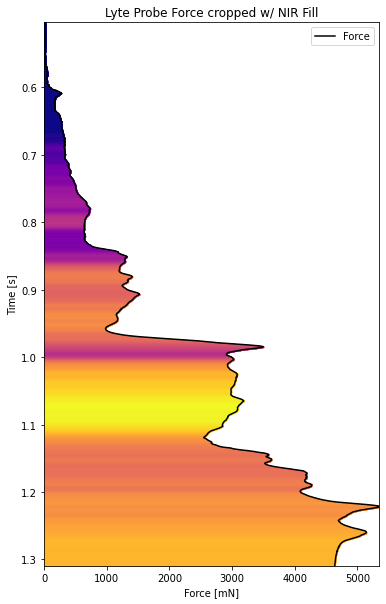

In [30]:
import matplotlib
import numpy as np 

cmap = matplotlib.cm.plasma
normalize = matplotlib.colors.Normalize(vmin=2900, vmax=df['Sensor3'].max())


fig, ax = plt.subplots(figsize=(6,10))
n_values = 10000

for idx in df.index[0:-1*shift]:
    d = [df['force'].iloc[idx], df['force'].iloc[idx+1]]
    indicies = [df['time'].iloc[idx], df['time'].iloc[idx+1]]
    ax.fill_betweenx(indicies, d,
                    color=cmap(normalize(df['Sensor3'].iloc[idx])))

        
# Plot up the force profile 
ax.plot(df['force'], df['time'], color='k', label='Force')
ax.set_title("Lyte Probe Force cropped w/ NIR Fill")
ax.set_xlabel('Force [mN]')
ax.set_ylabel('Time [s]')

# Guess at bottom stop
ax.set_ylim(df['time'].iloc[surface], df['time'].iloc[21000])
ax.set_xlim(0,df['force'].max())
ax.legend()
ax.invert_yaxis()
